### Customer Churn Combination Prediction Model Based on Decision Tree and Neural Network

In [ ]:
#impoprt liabriris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Load the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_data = pd.read_csv(file_path)

In [ ]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# checking datatypes
churn_data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

It seems that total charges is object but it should be numerical. So.....


In [ ]:
# Convert 'TotalCharges' to numeric and drop missing values
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data_cleaned = churn_data.dropna(subset=['TotalCharges'])

In [ ]:
# checking datatypes
churn_data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# Identifying categorical and numerical columns
categorical_cols = churn_data_cleaned.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn'])
numerical_cols = churn_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [ ]:
# Applying the transformations
X = preprocessor.fit_transform(churn_data_cleaned.drop(['customerID', 'Churn'], axis=1))
y = churn_data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0).values

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluating the Decision Tree Model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(dt_accuracy)


0.7275312855517634


In [ ]:
from sklearn.neural_network import MLPClassifier

# Neural Network Model
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

# Evaluating the Neural Network Model
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(nn_accuracy)


0.7650739476678043


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Combined Model
combined_predictions = (dt_predictions + nn_predictions) / 2

# Evaluating the Combined Model
combined_accuracy = accuracy_score(y_test, combined_predictions > 0.5)

# Print accuracy
print(combined_accuracy)

0.7810011376564278


In [ ]:
# confusion matrix table for three model

from sklearn.metrics import confusion_matrix
import pandas as pd
# Confusion Matrix for Decision Tree Model
dt_cm = confusion_matrix(y_test, dt_predictions)
dt_cm_df = pd.DataFrame(dt_cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
print(dt_cm_df)

# Confusion Matrix for Neural Network Model
nn_cm = confusion_matrix(y_test, nn_predictions)
nn_cm_df = pd.DataFrame(nn_cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
print(nn_cm_df)

# Confusion Matrix for Combined Model
combined_cm = confusion_matrix(y_test, combined_predictions > 0.5)
combined_cm_df = pd.DataFrame(combined_cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
print(combined_cm_df)


            Predicted No  Predicted Yes
Actual No           1040            260
Actual Yes           219            239
            Predicted No  Predicted Yes
Actual No           1129            171
Actual Yes           242            216
            Predicted No  Predicted Yes
Actual No           1221             79
Actual Yes           306            152


In [ ]:
# Compare the accuracies
print("Decision Tree Accuracy:", dt_accuracy)
print("Neural Network Accuracy:", nn_accuracy)
print("Combined Model Accuracy:", combined_accuracy)

Decision Tree Accuracy: 0.7275312855517634
Neural Network Accuracy: 0.7650739476678043
Combined Model Accuracy: 0.7810011376564278


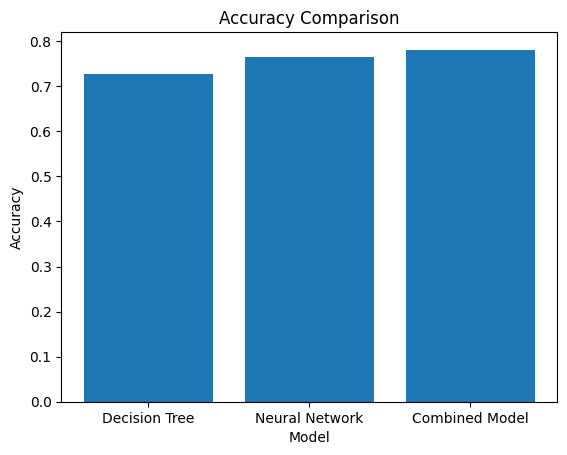

In [ ]:
# Accuracy comparison
import matplotlib.pyplot as plt
# Creating a bar chart comparing the accuracies of the three models.
plt.bar(['Decision Tree', 'Neural Network', 'Combined Model'], [dt_accuracy, nn_accuracy, combined_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


The combined model got higher accuracy than other two model's indivisiual accuracy
